<a href="https://colab.research.google.com/github/Bilal-Ahmad-5/DAF/blob/main/DA'F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pandas numpy tensorflow scikit-learn matplotlib seaborn transformers trl peft accelerate bitsandbytes tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.6/504.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.3 MB/s eta 0:00:00


In [2]:
import kagglehub, os, pandas as pd

# Download the dataset
path = kagglehub.dataset_download("felixzhao/productdemandforecasting")
print("Download path:", path)

# List all files
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith('.csv'):
            full_path = os.path.join(root, f)
            print(" -> Found CSV:", full_path)

# Choose the correct CSV file path above and load
file = full_path  # once identified
df = pd.read_csv(file)
print("\nINFO:\n")
print(df.info())
print("\nDESCRIBE:\n")
print(df.describe())
print("\nSHAPE:\n")
print(df.shape)
print("\nCOLUMNS:\n")
print(df.columns)
print("\nDATA TYPES:\n")
print(df.dtypes)
print("\nUNIQUE VALUES:\n")
print(df.nunique())
print("\nHEAD:\n")
print(df.head())
print("\nTAIL\n:")
print(df.tail())

Download path: /kaggle/input/productdemandforecasting
 -> Found CSV: /kaggle/input/productdemandforecasting/Historical Product Demand.csv

INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB
None

DESCRIBE:

        Product_Code Warehouse Product_Category       Date Order_Demand
count        1048575   1048575          1048575    1037336      1048575
unique          2160         4               33       1729         3828
top     Product_1359    Whse_J     Category_019  2013/9/27        1000 
freq           16936    764447           481099       2075  

In [3]:
print("NULL VALUES:")
print(df.isnull().sum())

# Convert 'Date' column to datetime objects, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Calculate the median date (or choose another method like forward fill or a constant date)
median_date = df['Date'].median()

# Fill missing values in 'Date' column with the median date
df['Date'].fillna(median_date, inplace=True)

print("\nNULL VALUES AFTER FILLING:")
print(df.isnull().sum())

NULL VALUES:
Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

NULL VALUES AFTER FILLING:


/tmp/ipython-input-956463028.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(median_date, inplace=True)


Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


In [6]:
# duplicate Values
print("Duplicate Values:")
print(df[df.duplicated()])

# Remove Duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicate Values After Removal:")
print(df[df.duplicated()])

Duplicate Values:
Empty DataFrame
Columns: [Product_Code, Warehouse, Product_Category, Date, Order_Demand]
Index: []

Duplicate Values After Removal:
Empty DataFrame
Columns: [Product_Code, Warehouse, Product_Category, Date, Order_Demand]
Index: []


In [8]:
# Handle inconsistencies
print("Unique values before cleaning:")
for col in ['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand']:
    print(f"\n{col}:\n{df[col].value_counts()}")

df['Product_Code'] = df['Product_Code'].str.strip()
df['Warehouse'] = df['Warehouse'].str.strip()
df['Product_Category'] = df['Product_Category'].str.strip()
df['Order_Demand'] = df['Order_Demand'].str.strip()

print("\nUnique values after cleaning:")
for col in ['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand']:
    print(f"\n{col}:\n{df[col].value_counts()}")

Unique values before cleaning:

Product_Code:
Product_Code
Product_1359    10859
Product_1295     7255
Product_1378     6778
Product_1286     6258
Product_1382     6038
                ...  
Product_1698        2
Product_1703        1
Product_0853        1
Product_2099        1
Product_0465        1
Name: count, Length: 2160, dtype: int64

Warehouse:
Warehouse
Whse_J    665603
Whse_A    132624
Whse_S     86209
Whse_C     41705
Name: count, dtype: int64

Product_Category:
Product_Category
Category_019    404686
Category_005     91234
Category_001     84469
Category_007     73376
Category_021     50076
Category_006     32756
Category_028     29117
Category_015     22469
Category_011     21488
Category_024     20360
Category_009     19440
Category_026     13897
Category_030     12572
Category_032      9025
Category_022      8543
Category_023      7302
Category_018      5061
Category_003      4014
Category_013      3667
Category_020      3364
Category_031      2189
Category_033      1704
C

In [15]:
# Remove outliers from 'Order_Demand'
print("Removing outliers from column: Order_Demand")
Q1 = df['Order_Demand'].quantile(0.25)
Q3 = df['Order_Demand'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Order_Demand'] >= lower_bound) & (df['Order_Demand'] <= upper_bound)]
print(f"Shape after removing outliers from Order_Demand: {df.shape}")

print("\nShape after removing outliers from all numerical columns:")
print(df.shape)

Removing outliers from column: Order_Demand
Shape after removing outliers from Order_Demand: (496476, 5)

Shape after removing outliers from all numerical columns:
(496476, 5)


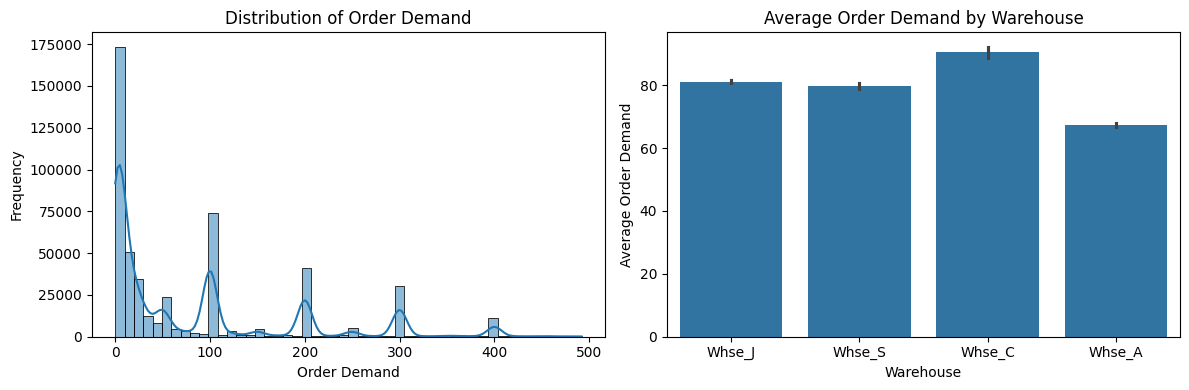

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of Order_Demand
sns.histplot(df['Order_Demand'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Order Demand')
axes[0].set_xlabel('Order Demand')
axes[0].set_ylabel('Frequency')


# Bar plot of average Order_Demand by Warehouse
sns.barplot(x='Warehouse', y='Order_Demand', data=df)
axes[1].set_title('Average Order Demand by Warehouse')
axes[1].set_xlabel('Warehouse')
axes[1].set_ylabel('Average Order Demand')

plt.tight_layout()
plt.show()

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.20, random_state=0)

train_df = train_df.sample(frac=0.01, random_state=0)
test_df = test_df.sample(frac=0.01, random_state=0)

print(train_df.shape)
print(test_df.shape)

(3972, 5)
(993, 5)


In [24]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [25]:
# The model that you want to train from the Hugging Face hub
model_name = "NousResearch/Llama-2-7b-chat-hf"

# Fine-tuned model name
new_model = "Batti-ai/Beepseek-R1"

################################################################################
# QLoRA parameters
################################################################################

# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

################################################################################
# bitsandbytes parameters
################################################################################

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "fp4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

################################################################################
# TrainingArguments parameters
################################################################################

# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 1

# Enable fp16/bf16 training (set bf16 to True with an A100)
fp16 = False
bf16 = False

# Batch size per GPU for training
per_device_train_batch_size = 4

# Batch size per GPU for evaluation
per_device_eval_batch_size = 4

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 1

# Enable gradient checkpointing
gradient_checkpointing = True

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)
learning_rate = 2e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule
lr_scheduler_type = "cosine"

# Number of training steps (overrides num_train_epochs)
max_steps = -1

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 0

# Log every X updates steps
logging_steps = 25

################################################################################
# SFT parameters
################################################################################

# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = {"": 0}

In [ ]:
# Load tokenizer and model with QLoRA configuration
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type="fp4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)


# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map,
)
model.config.use_cache = False
model.config.pretraining_tp = 1

# Print the quantization config of the loaded model
print("Loaded model quantization config:")
print(model.config.quantization_config)


# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

In [ ]:
# Concatenate relevant columns into a single text column for tokenization
train_df['text'] = train_df['Product_Code'] + " " + train_df['Warehouse'] + " " + train_df['Product_Category'] + " " + train_df['Date'].astype(str) + " " + train_df['Order_Demand']
test_df['text'] = test_df['Product_Code'] + " " + test_df['Warehouse'] + " " + test_df['Product_Category'] + " " + test_df['Date'].astype(str) + " " + test_df['Order_Demand']

# Tokenize the text column
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
from datasets import Dataset

# Create Hugging Face datasets from tokenized encodings
train_dataset = Dataset.from_dict(train_encodings)

# Test Data
test_dataset = Dataset.from_dict(test_encodings)

In [ ]:
# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)

# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    peft_config=peft_config,
    args=training_arguments,
)

# Train model
trainer.train()

In [ ]:
trainer.model.save_pretrained(new_model)

In [ ]:
# Ignore warnings
logging.set_verbosity(logging.CRITICAL)

# Run text generation pipeline with our next model
prompt = "What is the anticipated order demand for Product_0993 in Warehouse_J for the next quarter?"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"[INST] {prompt} [/INST]")
print(result[0]['generated_text'])